## Naive Bayes Theorem

In [2]:
# works on conditional probability

In [3]:
#P(H/E)= (P(E/H).P(H))/P(E)
# finding post area probability using prior probability before getting evidence

In [4]:
# all features are independent

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline

In [6]:
dataset=pd.read_csv(r'C:/Users/Shambhavi/Downloads/datasets/purchase_salary.csv')

In [7]:
dataset.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [9]:
dataset.kurt()

User ID           -1.182359
Age               -0.622513
EstimatedSalary   -0.405878
Purchased         -1.651992
dtype: float64

In [10]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [11]:
dataset.shape

(400, 5)

In [12]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [13]:
pd.unique(dataset['Purchased'])

array([0, 1], dtype=int64)

C:\Users\Shambhavi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


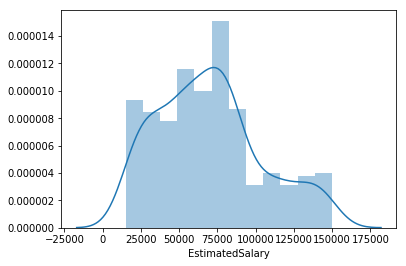

In [14]:
sb.distplot(dataset['EstimatedSalary'])

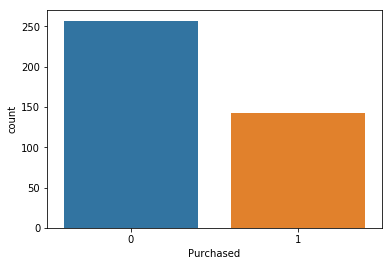

In [15]:
sb.countplot(dataset['Purchased'])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=101)

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\Users\Shambhavi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
X_train

array([[-1.59714384,  0.55764978],
       [-0.73526076, -1.61636537],
       [-0.25643682,  0.11093433],
       [-0.25643682, -0.57402934],
       [ 1.37156457,  2.04670124],
       [ 0.12662233, -0.81227758],
       [-0.83102554,  0.17049639],
       [-0.92679033,  0.5874308 ],
       [ 1.08427021,  0.5874308 ],
       [-0.25643682, -1.37811714],
       [-0.06490724, -0.36556214],
       [ 2.13768287,  1.15327036],
       [-1.40561427, -1.22921199],
       [ 2.04191808,  0.20027742],
       [ 1.85038851, -0.27621905],
       [-0.25643682,  0.08115331],
       [ 1.94615329,  2.22538742],
       [-1.88443821, -0.75271552],
       [-1.78867342,  0.20027742],
       [ 0.79697584, -1.11008787],
       [ 0.89274063, -1.05052581],
       [ 0.03085754,  1.30217551],
       [-1.40561427, -0.6335914 ],
       [-0.73526076,  1.3915186 ],
       [-0.25643682, -0.57402934],
       [ 1.08427021,  0.49808772],
       [ 0.31815191,  0.08115331],
       [ 1.94615329, -1.37811714],
       [-0.16067203,

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None)

In [20]:
y_pred=classifier.predict(X_test)

In [21]:
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [22]:
classifier.score(X_test,y_test)

0.85

In [23]:
X_new=sc.transform([[42,100000]])
classifier.predict(X_new)

array([1], dtype=int64)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[22  5]
 [ 1 12]]
             precision    recall  f1-score   support

          0       0.96      0.81      0.88        27
          1       0.71      0.92      0.80        13

avg / total       0.88      0.85      0.85        40



## Random Forest

In [25]:
#Decision tree based algorithm

In [26]:
from sklearn import datasets
iris=datasets.load_iris()

In [27]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [28]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [29]:
data=pd.DataFrame({'sepal length':iris.data[:,0],
                 'sepal width':iris.data[:,1],
                 'petal length':iris.data[:,2],
                 'petal width':iris.data[:,3],
                  'species':iris.target})

In [30]:
data.head()

,petal length,petal width,sepal length,sepal width,species
0,1.4,0.2,5.1,3.5,0
1,1.4,0.2,4.9,3.0,0
2,1.3,0.2,4.7,3.2,0
3,1.5,0.2,4.6,3.1,0
4,1.4,0.2,5.0,3.6,0


In [31]:
X=data[['sepal length','sepal width','petal length','petal width']]
y=data['species']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [32]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [33]:
from sklearn.ensemble import RandomForestClassifier  # ensemble is a package that uses multiple ml algorithms[ random forest uses multiple decision trees]
clf =RandomForestClassifier(n_estimators=100) # create 100 decision trees 
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [34]:
from sklearn import metrics
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

Accuracy 0.9777777777777777


In [35]:
clf.predict([[3,5,4,2]])

array([1])

In [36]:
features_imp=pd.Series(clf.feature_importances_,index=iris.feature_names)
features_imp

sepal length (cm)    0.093515
sepal width (cm)     0.020494
petal length (cm)    0.438483
petal width (cm)     0.447508
dtype: float64

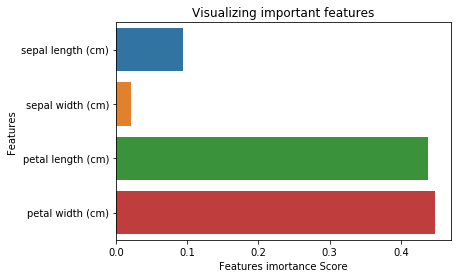

In [37]:
sb.barplot(x=features_imp,y=features_imp.index)
plt.xlabel('Features imortance Score')
plt.ylabel('Features')
plt.title('Visualizing important features')
plt.show()

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend()
    plt.show()

In [43]:
probs=clf.predict_proba(X_test)
probs


array([[0.  , 0.  , 1.  ],
       [0.  , 0.98, 0.02],
       [0.99, 0.01, 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.91, 0.09],
       [0.  , 1.  , 0.  ],
       [0.  , 0.31, 0.69],
       [0.  , 0.99, 0.01],
       [0.  , 1.  , 0.  ],
       [0.  , 0.97, 0.03],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.94, 0.06],
       [0.  , 0.99, 0.01],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.2 , 0.8 ],
       [0.  , 0.94, 0.06],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.22, 0.78],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.01, 0.96, 0.03],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.03, 0.87, 0.1 ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.16, 0.84],
       [0.  , 0.  , 1.  ],
       [0.  , 0.98, 0.02],
       [0.98, 0.02, 0.  ],
 